In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_csv('all_month.csv')

#1.Which area in US has faced most of the earthquakes?

df2= df['place'].str.split(', ').str[1]
df2.value_counts().idxmax()

'CA'

Cluster #0: Highest Chance, Cluster #1: Medium Chance, Cluster #2: Least Chance
[[  18.4616741   -64.74040234    2.6522314 ]
 [  40.83914988 -162.13022375    0.63411765]
 [  36.97006306 -116.67612497    1.02712372]]


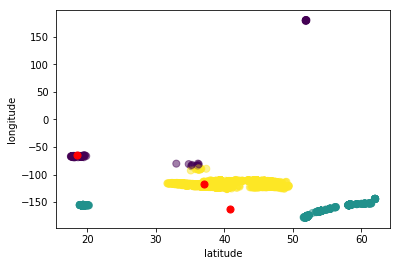

In [20]:
#2. Designing a cluster of latitude and longitude which has highest chances of getting an earthquake?

modifieddata=df.dropna()
df1 = pd.DataFrame(modifieddata, columns=['latitude', 'longitude', 'mag'])
kmeans = KMeans(n_clusters=3).fit(df1)
centroids = kmeans.cluster_centers_
print("Cluster #0: Highest Chance, Cluster #1: Medium Chance, Cluster #2: Least Chance")
print(centroids)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.scatter(modifieddata['latitude'], modifieddata['longitude'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


In [16]:
# 3: Extracting an average magnitude of earthquake from one place within certain range?

df[['region','state']]=df.place.str.split(", ",expand=True,).drop(2,axis=1)
modifieddata=df.copy()
print(modifieddata.state.unique())
print("Please enter palce from above list in which you want to find average magnitude")
name=raw_input()
x=True
while(x):
    if(modifieddata['state'].isin([name]).any() ):
        sample=modifieddata[modifieddata['state']==name].groupby('state')['latitude','longitude'].mean()

        print(sample['latitude'])

        print("Please enter range in miles")
        range=input()    
        maxlat=sample['latitude']+range/69
        minlat=sample['latitude']-range/69
        maxlon=sample['longitude']+range/40
        minlon=sample['longitude']-range/40

        if(range==0):
            modifieddata=df.loc[df['state'] == name, 'mag'].mean()
        
        else:
            modifieddata=df.loc[df['latitude'].between(np.asscalar(minlat),np.asscalar(maxlat),inclusive=True),['longitude','mag']]
            modifieddata=modifieddata.loc[df['longitude'].between(np.asscalar(minlon),np.asscalar(maxlon),inclusive=True),'mag'].mean()
            if type(modifieddata) == float and pd.isna(modifieddata):
                modifieddata=df.loc[df['state'] == name, 'mag'].mean()
        print('Average Magnitude:',modifieddata)
        x=False
    else:
        print("Place not found!! Please copy the name from above list and paste it here:")
        name=raw_input()



['CA' 'Alaska' 'Idaho' 'Utah' 'Puerto Rico' 'Montana' 'Albania'
 'California' 'Washington' 'Hawaii' 'Indonesia' 'Argentina' 'Peru'
 'Wyoming' 'Nevada' 'New Mexico' 'Oregon' 'Chile' 'B.C.' 'Philippines'
 'Oklahoma' 'Mexico' 'Russia' 'Northern Mariana Islands' 'Oman' 'Tonga'
 'Japan' 'Papua New Guinea' 'Missouri' 'Colombia' 'India' None 'Taiwan'
 'Canada' 'France' 'Turkey' 'Romania' 'Pakistan' 'Tajikistan'
 'Dominican Republic' 'Guatemala' 'Maine' 'Greece' 'Kansas' 'Colorado'
 'Tennessee' 'South Sandwich Islands' 'New Caledonia' 'Afghanistan' 'Guam'
 'Zimbabwe' 'China' 'New Zealand' 'Honduras' 'El Salvador' 'Pennsylvania'
 'Costa Rica' 'Wallis and Futuna' 'Kyrgyzstan'
 'South Georgia and the South Sandwich Islands' 'Trinidad and Tobago'
 'Solomon Islands' 'Ohio' 'Arkansas' 'South Carolina' 'Vanuatu' 'Iceland'
 'North Carolina' 'Greenland' 'East Timor' 'Fiji' 'Texas' 'Syria' 'Italy'
 'NV' 'Burma' 'Nicaragua' 'Mozambique' 'Arizona' 'Antigua and Barbuda'
 'Ecuador' 'New York' 'U.S. Virgin I